In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics
from scipy.optimize import curve_fit
from scipy.stats import truncnorm

In [2]:
import os

# Define default path for saving figures
data_path = "/Users/boyapeng/Desktop/Dissertation/Aim2/Data"

# Create the directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

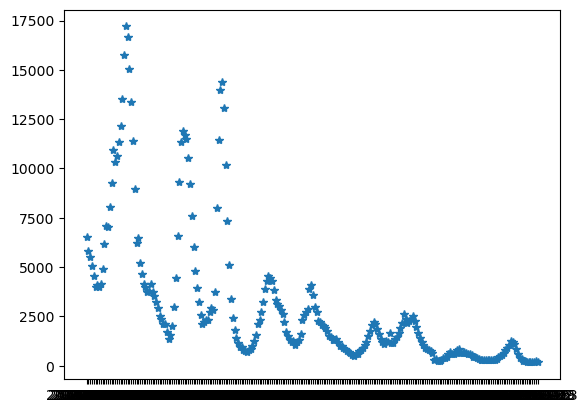

In [3]:
vac = pd.read_csv(os.path.join(data_path,'COVID_RD19_Vaccination_curves.csv'))
hosp = pd.read_csv(os.path.join(data_path,'time-series.csv'))

GC = hosp[(hosp["location"] == '48') & (hosp["age_group"] == '0-130')]
GC = GC.sort_values(by="date").reset_index(drop=True)
y_hosp = GC['observation'].to_numpy()
x_hosp = GC['date'].to_numpy()
plt.plot(x_hosp,y_hosp, '*')

In [15]:
GC[(GC["date"] >= "2024-08-01") & (GC["date"] <= "2024-12-01")]

,date,location,observation,age_group,target
196,2024-11-09,48,327,0-130,inc hosp
197,2024-11-16,48,229,0-130,inc hosp
198,2024-11-23,48,268,0-130,inc hosp
199,2024-11-30,48,284,0-130,inc hosp


/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/1518740511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GC_["T"] = range(len(GC_))


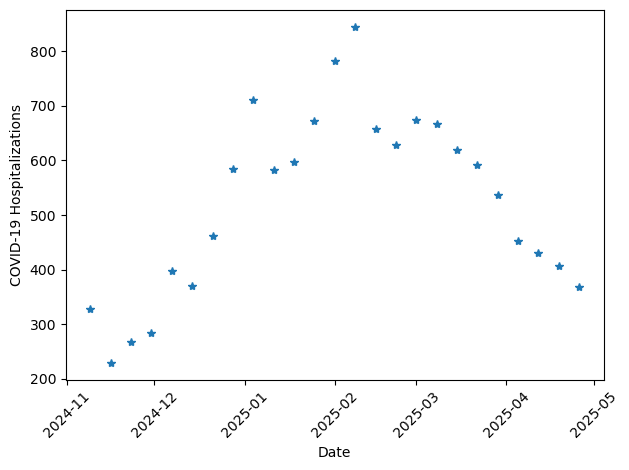

In [16]:
GC_ = GC[(GC["date"] >= "2024-11-01") & (GC["date"] <= "2025-04-26")]
GC_["T"] = range(len(GC_))
y_hosp = GC_['observation'].to_numpy()
x_hosp = GC_['date'].to_numpy()
x_hosp = pd.to_datetime(x_hosp)

import matplotlib.dates as mdates

plt.figure()
plt.plot(x_hosp, y_hosp, '*')

plt.xlabel("Date")
plt.ylabel("COVID-19 Hospitalizations")

# display fewer x-ticks (e.g., one tick every month)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("hosp.png", dpi=300, bbox_inches="tight")

plt.show()

In [656]:
time = GC_['T']
GC_

,date,location,observation,age_group,target,T
196,2024-11-09,48,327,0-130,inc hosp,0
197,2024-11-16,48,229,0-130,inc hosp,1
198,2024-11-23,48,268,0-130,inc hosp,2
199,2024-11-30,48,284,0-130,inc hosp,3
200,2024-12-07,48,397,0-130,inc hosp,4
201,2024-12-14,48,370,0-130,inc hosp,5
202,2024-12-21,48,462,0-130,inc hosp,6
203,2024-12-28,48,585,0-130,inc hosp,7
204,2025-01-04,48,711,0-130,inc hosp,8
205,2025-01-11,48,582,0-130,inc hosp,9


In [37]:
# Fileter data based on the time range of the hospitalization data
# Convert 'Start_Date' column to datetime format
vac['Date'] = pd.to_datetime(vac['Date'])
GC_["date"] = pd.to_datetime(GC_["date"])

# Define the filtering range
start = GC_['date'].min() - pd.Timedelta(days=7)
end = GC_["date"].max() + pd.Timedelta(days=1)

# Filter the dataframe within the date range
filtered_vacc = vac[(vac['Date'] >= start) & (vac['Date'] <= end) & (vac['Geography']=='Texas')]

# Sort by Start_Date to ensure T is in time order
filtered_vacc = filtered_vacc.sort_values(by='Date').reset_index(drop=True)

filtered_vacc = filtered_vacc[
    (filtered_vacc['Risk_group'] == 'Overall')
]

filtered_vacc

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/1627266979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GC_["date"] = pd.to_datetime(GC_["date"])


,Geography,Age,Risk_group,Pop,Cum.Coverage.Percent,Scenario,Date
1,Texas,6 months-17 years,Overall,7246534.0,5.3,Historic coverage,2024-11-03
2,Texas,50-64 years,Overall,5023507.0,9.9,Historic coverage,2024-11-03
5,Texas,18-49 years,Overall,12914190.0,6.1,Historic coverage,2024-11-03
7,Texas,65+ years,Overall,3873683.0,24.2,Historic coverage,2024-11-03
11,Texas,65+ years,Overall,3873683.0,25.6,Historic coverage,2024-11-10
12,Texas,18-49 years,Overall,12914190.0,6.4,Historic coverage,2024-11-10
13,Texas,6 months-17 years,Overall,7246534.0,5.7,Historic coverage,2024-11-10
14,Texas,50-64 years,Overall,5023507.0,10.6,Historic coverage,2024-11-10
18,Texas,50-64 years,Overall,5023507.0,11.2,Historic coverage,2024-11-17
19,Texas,65+ years,Overall,3873683.0,26.8,Historic coverage,2024-11-17


In [42]:
#sum vaccination counts across age groups (Cum.Coverage.Percent*Pop/100), then calculate new vaccination for each time point (diff)
# ensure Date is datetime
# compute vaccinated count per row
filtered_vacc["vaccinated_cnt"] = filtered_vacc["Cum.Coverage.Percent"] * filtered_vacc["Pop"] / 100.0

# sum across age groups by date (and scenario / geography if needed)
vacc_ts = (
    filtered_vacc.groupby(["Date"], as_index=False)
      .agg(total_vaccinated=("vaccinated_cnt", "sum"))
      .sort_values("Date")
)

vacc_ts["total_vaccinated"] = round(vacc_ts["total_vaccinated"])

# newly added vaccinations at each time point
vacc_ts["new_vaccinated"] = vacc_ts["total_vaccinated"].diff()

# optional: fill first diff with 0
vacc_ts["new_vaccinated"] = vacc_ts["new_vaccinated"].fillna(0)

vacc_ts

,Date,total_vaccinated,new_vaccinated
0,2024-11-03,2606590.0,0.0
1,2024-11-10,2763715.0,157125.0
2,2024-11-17,2915316.0,151601.0
3,2024-11-24,3054145.0,138829.0
4,2024-12-01,3181855.0,127710.0
5,2024-12-08,3292776.0,110921.0
6,2024-12-15,3394800.0,102024.0
7,2024-12-22,3492951.0,98151.0
8,2024-12-29,3574958.0,82007.0


In [43]:
#Extend to 2024-06-09
# define start and end dates
start_date = GC_["date"].min() + pd.Timedelta(days=1)
end_date = GC_["date"].max() + pd.Timedelta(days=1)

# create full weekly timeline (same weekday as 2024-06-09)
full_dates = pd.date_range(start=start_date, end=end_date, freq="7D")

# reindex to full timeline
vacc_ts_full = (
    vacc_ts
    .set_index("Date")
    .reindex(full_dates)
    .fillna(0)
    .reset_index()
    .rename(columns={"index": "Date"})
)

# optional: ensure numeric columns are float
vacc_ts_full[["total_vaccinated", "new_vaccinated"]] = (
    vacc_ts_full[["total_vaccinated", "new_vaccinated"]].astype(float)
)

vacc_ts_full

,Date,total_vaccinated,new_vaccinated
0,2024-11-10,2763715.0,157125.0
1,2024-11-17,2915316.0,151601.0
2,2024-11-24,3054145.0,138829.0
3,2024-12-01,3181855.0,127710.0
4,2024-12-08,3292776.0,110921.0
5,2024-12-15,3394800.0,102024.0
6,2024-12-22,3492951.0,98151.0
7,2024-12-29,3574958.0,82007.0
8,2025-01-05,0.0,0.0
9,2025-01-12,0.0,0.0


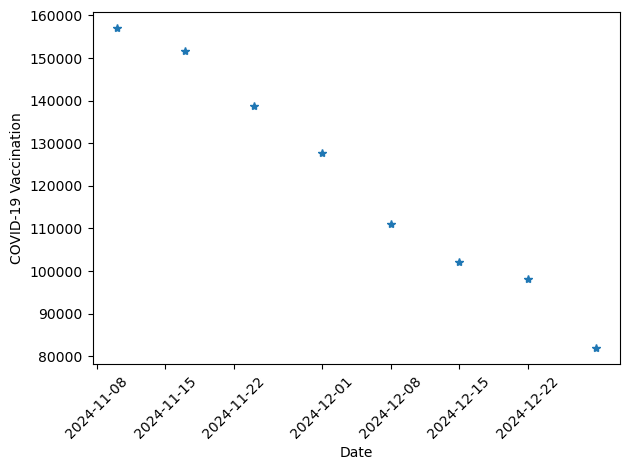

In [44]:
y_vac = vacc_ts_full["new_vaccinated"]
x_vac = vacc_ts_full["Date"]

plt.figure()
plt.plot(vacc_ts["Date"].loc[1:], vacc_ts["new_vaccinated"].loc[1:], '*')

plt.xlabel("Date")
plt.ylabel("COVID-19 Vaccination")

# display fewer x-ticks (e.g., one tick every month)
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("vac.png", dpi=300, bbox_inches="tight")
plt.show()

In [774]:
# =========================
# Vaccine-related parameters
# =========================

# VE against infection
# https://www.cdc.gov/flu-vaccines-work/php/effectiveness-studies/index.html?
epsilon1_lb = 0.35
epsilon1_ub = 0.57
epsilon1_pe = (epsilon1_lb + epsilon1_ub) / 2.0

# Vaccine efficacy against hospitalization (initial)
epsilon2 = 0.45

# Refection rate
reinf = 1/ 19
re_pro = (0.1+0.3)/2

# Waning time (months)
waning_time_lb = 3*30
waning_time_ub = 10*30
waning_time_pe = (waning_time_lb + waning_time_ub)/2
wan = 1.0 / waning_time_pe

# Vaccine efficacy reduction in waned state
ve_reduction_lb = 0.40
ve_reduction_ub = 0.60
ve_reduction_pe = (ve_reduction_lb + ve_reduction_ub) / 2

# Immune escape
immune_escape_lb = 0.20
immune_escape_ub = 0.50
immune_escape_pe = (immune_escape_lb + immune_escape_ub) / 2

# =========================
# Other model parameters
# =========================

# Total population
N = 31_290_831

# Latent rate (E -> I), sigma
sigma_lb = 1.0 / 3.0
sigma_ub = 1.0 / 1.0
sigma_pe = (sigma_lb + sigma_ub) / 2.0

# Recovery rate (I -> R), gamma
gamma_lb = 1.0 / 7
gamma_ub = 1.0 / 5
gamma_pe = (gamma_lb + gamma_ub) / 2.0

# Recovery rate (H -> R)
gam2 = 1 / (7 + 14)

# Infectious to Hospitalization rate (IHR)
IHR_lb = 0.003
IHR_ub = 0.01
IHR_pe = (IHR_lb + IHR_ub) / 2.0

delta = 1 / (8 + 10) #duration (+latent)

# Hospitalization to Death rate (HDR)
HDR = 0.16

eta = 1 / (10 + 14) #duration

# Reporting rate
rep = 0.2

# Vaccination Coverage in previous year
cov = 0.2


In [619]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(3):
        rate += aW*CWW[i][n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

In [775]:
def sim_fit(x, beta):
    Nd = 180
    dt = 1

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    for tt in range(int(Nd / dt)):
          
        # Force of infection
        lambda_t = beta * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf * R
        
        SxS_new = SxS + reinf * R * (1-re_pro) - wan * SxS
        SxI_new = SxI + reinf * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in time:
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep
        
    return weekly_hosp[:-1]


In [830]:
from scipy.optimize import curve_fit

# Fit using cut-off data
ydata = y_hosp[1:]

xdata = np.arange(len(ydata))

# Curve fitting
popt, pcov = curve_fit(
    sim_fit,             # your updated function
    xdata,               # dummy xdata
    ydata,              # observed data
    p0=0.3,  # initial values
    bounds=(0.1,2), # upper and lower limits
    maxfev=10000        
)

# Output estimated parameters
print("Estimated beta:")
print(popt)

# Optional: view parameter uncertainty
print("\nCovariance matrix:")
print(pcov)


Estimated beta:
[0.24562527]

Covariance matrix:
[[1.11696757e-06]]


In [831]:
def sim_det(x, beta):
    Nd = 180
    dt = 1

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    for tt in range(int(Nd / dt)):
          
        # Force of infection
        lambda_t = beta * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf * R
        
        SxS_new = SxS + reinf * R * (1-re_pro) - wan * SxS
        SxI_new = SxI + reinf * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in time:
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep
        
    return weekly_hosp

weekly_hosp = sim_det(0, popt)

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/4220805148.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cumcase[tt] = case_count # cumulative case count up to day tt
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/4220805148.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/4220805148.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your a

In [832]:
weekly_hosp

array([151.90633597, 253.26892419, 339.73121276, 415.99833424,
       484.25105307, 544.97312835, 597.55766128, 640.85734977,
       673.83305624, 696.21415511, 707.97378833, 709.443832  ,
       701.47117528, 685.31849741, 662.51538944, 634.69832972,
       603.46908679, 570.28846196, 536.41038168, 502.85281095,
       470.39739872, 439.60849982, 410.86306615, 384.38475468,
       360.27766598])

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/1492272454.py:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  drange1 = pd.date_range(start_date, periods=week, freq="1w")
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/1492272454.py:10: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC_['date']).dt.to_pydatetime()


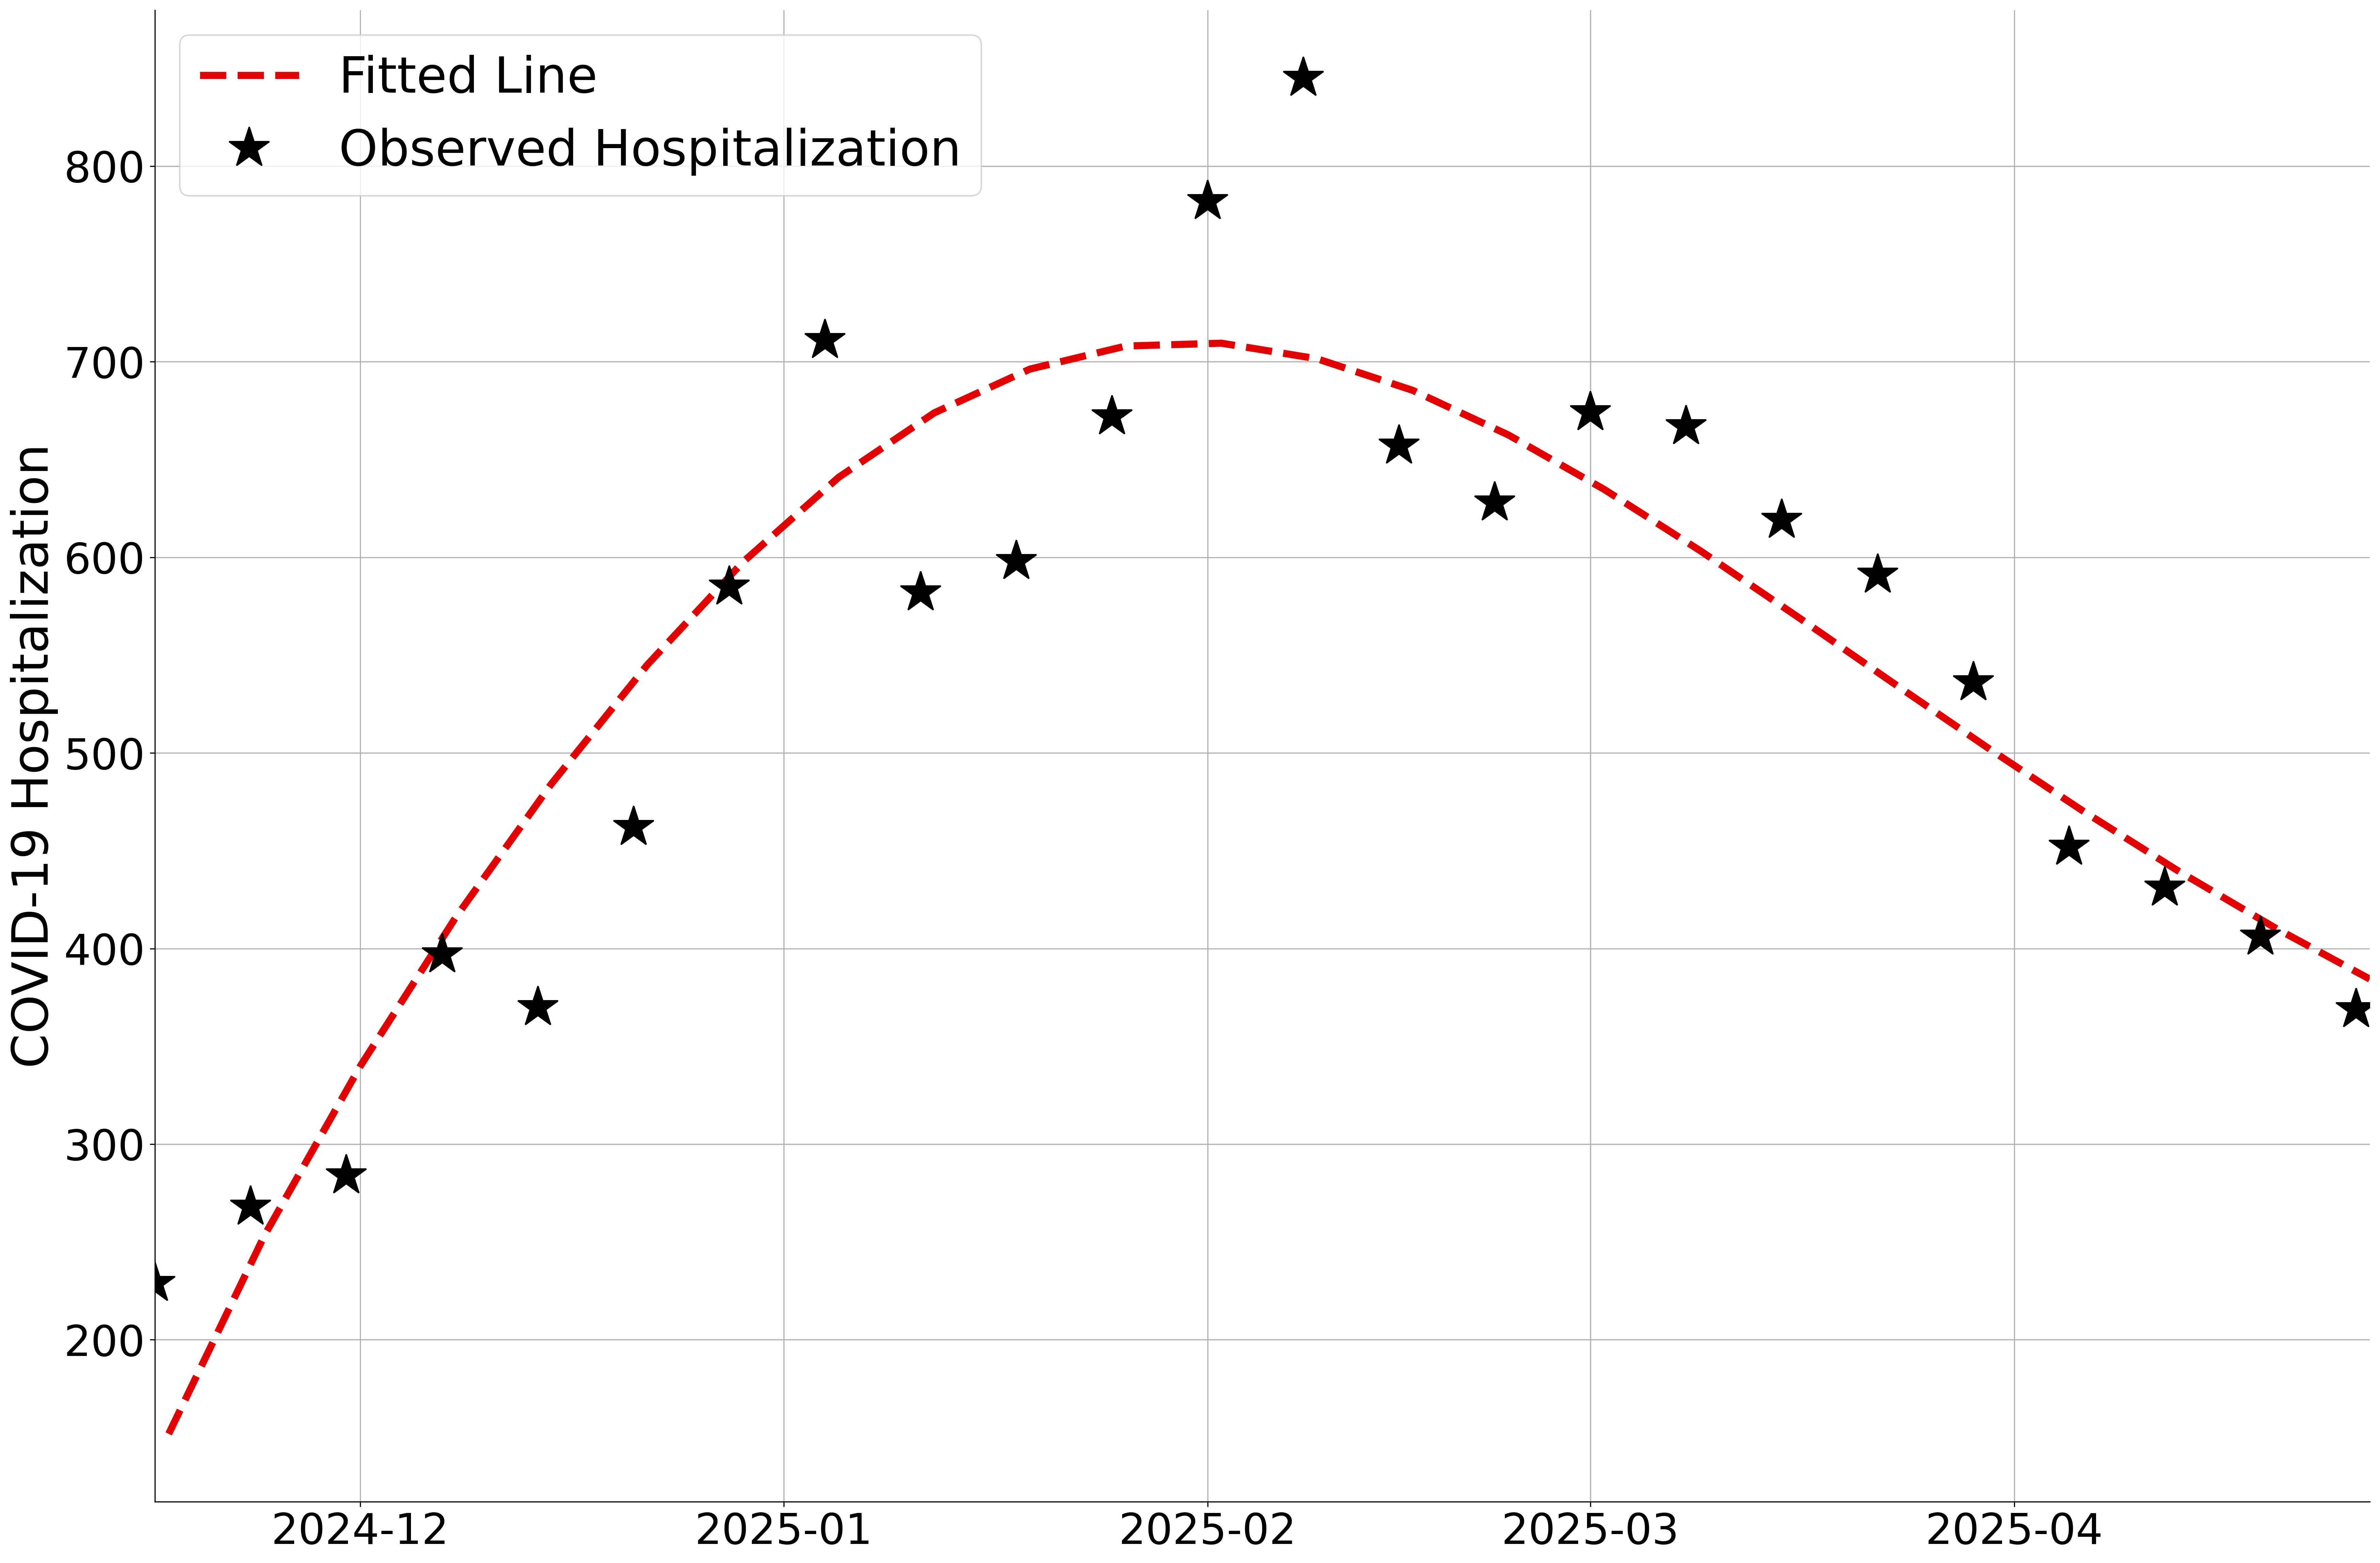

In [714]:
start_date = GC_['date'].iloc[0]
week = len(GC_)
drange1 = pd.date_range(start_date, periods=week, freq="1w")
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 30})

plt.plot(drange1[1:], weekly_hosp[:-1], '--', color='xkcd:red', lw=5, label = 'Fitted Line')


dates = pd.to_datetime(GC_['date']).dt.to_pydatetime()
plt.plot(dates[1:], GC_['observation'][1:], '*', color='black', markersize=30, label = 'Observed Hospitalization')

#plt.xticks(rotation=35)
plt.ylabel('COVID-19 Hospitalization', fontsize = 35)
plt.legend(fontsize=35,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()

plt.savefig("fit1.png", dpi=300, bbox_inches="tight")

plt.show()

## Projection

In [657]:
GC_1 = GC[(GC["date"] >= "2024-11-01") & (GC["date"] <= "2025-12-13")]
GC_1["T"] = range(len(GC_1))
time_1 = GC_1["T"]
GC_1

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/177214916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GC_1["T"] = range(len(GC_1))


,date,location,observation,age_group,target,T
196,2024-11-09,48,327,0-130,inc hosp,0
197,2024-11-16,48,229,0-130,inc hosp,1
198,2024-11-23,48,268,0-130,inc hosp,2
199,2024-11-30,48,284,0-130,inc hosp,3
200,2024-12-07,48,397,0-130,inc hosp,4
201,2024-12-14,48,370,0-130,inc hosp,5
202,2024-12-21,48,462,0-130,inc hosp,6
203,2024-12-28,48,585,0-130,inc hosp,7
204,2025-01-04,48,711,0-130,inc hosp,8
205,2025-01-11,48,582,0-130,inc hosp,9


In [754]:
def sim_fit1(x, beta, wan1):
    Nd = 180
    dt = 1

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    for tt in range(int(Nd / dt)):
          
        # Force of infection
        lambda_t = beta * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan1 * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf * R
        
        SxS_new = SxS + reinf * R * (1-re_pro) - wan1 * SxS
        SxI_new = SxI + reinf * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in time:
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep
        
    return weekly_hosp[:-1]

In [756]:
wan_list = [1/(3*30), 1/(6.5*30), 1/(10*30)]  

beta_fits = []
for wan in wan_list:
    # fix wan via a wrapper so curve_fit only optimizes beta
    f = lambda x, beta: sim_fit1(x, beta, wan)

    popt, pcov = curve_fit(
        f,
        xdata,
        ydata,
        p0=[0.3],
        bounds=([0.1], [2.0]),
        maxfev=20000
    )

    beta_hat = popt[0]
    beta_fits.append(beta_hat)

In [757]:
def sim_det1(x, beta, wan1):
    Nd = 410+510
    dt = 1

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    for tt in range(int(Nd / dt)):
          
        # Force of infection
        lambda_t = beta * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan1 * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf * R
        
        SxS_new = SxS + reinf * R * (1-re_pro) - wan1 * SxS
        SxI_new = SxI + reinf * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in range(129):
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep
        
    return weekly_hosp

weekly_hosp1 = sim_det1(0, beta_fits[0], wan_list[0])
weekly_hosp2 = sim_det1(0, beta_fits[1], wan_list[1])
weekly_hosp3 = sim_det1(0, beta_fits[2], wan_list[2])



/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/4045594693.py:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  drange1 = pd.date_range(start_date, periods=week, freq="1w")
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/4045594693.py:12: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC_1['date']).dt.to_pydatetime()


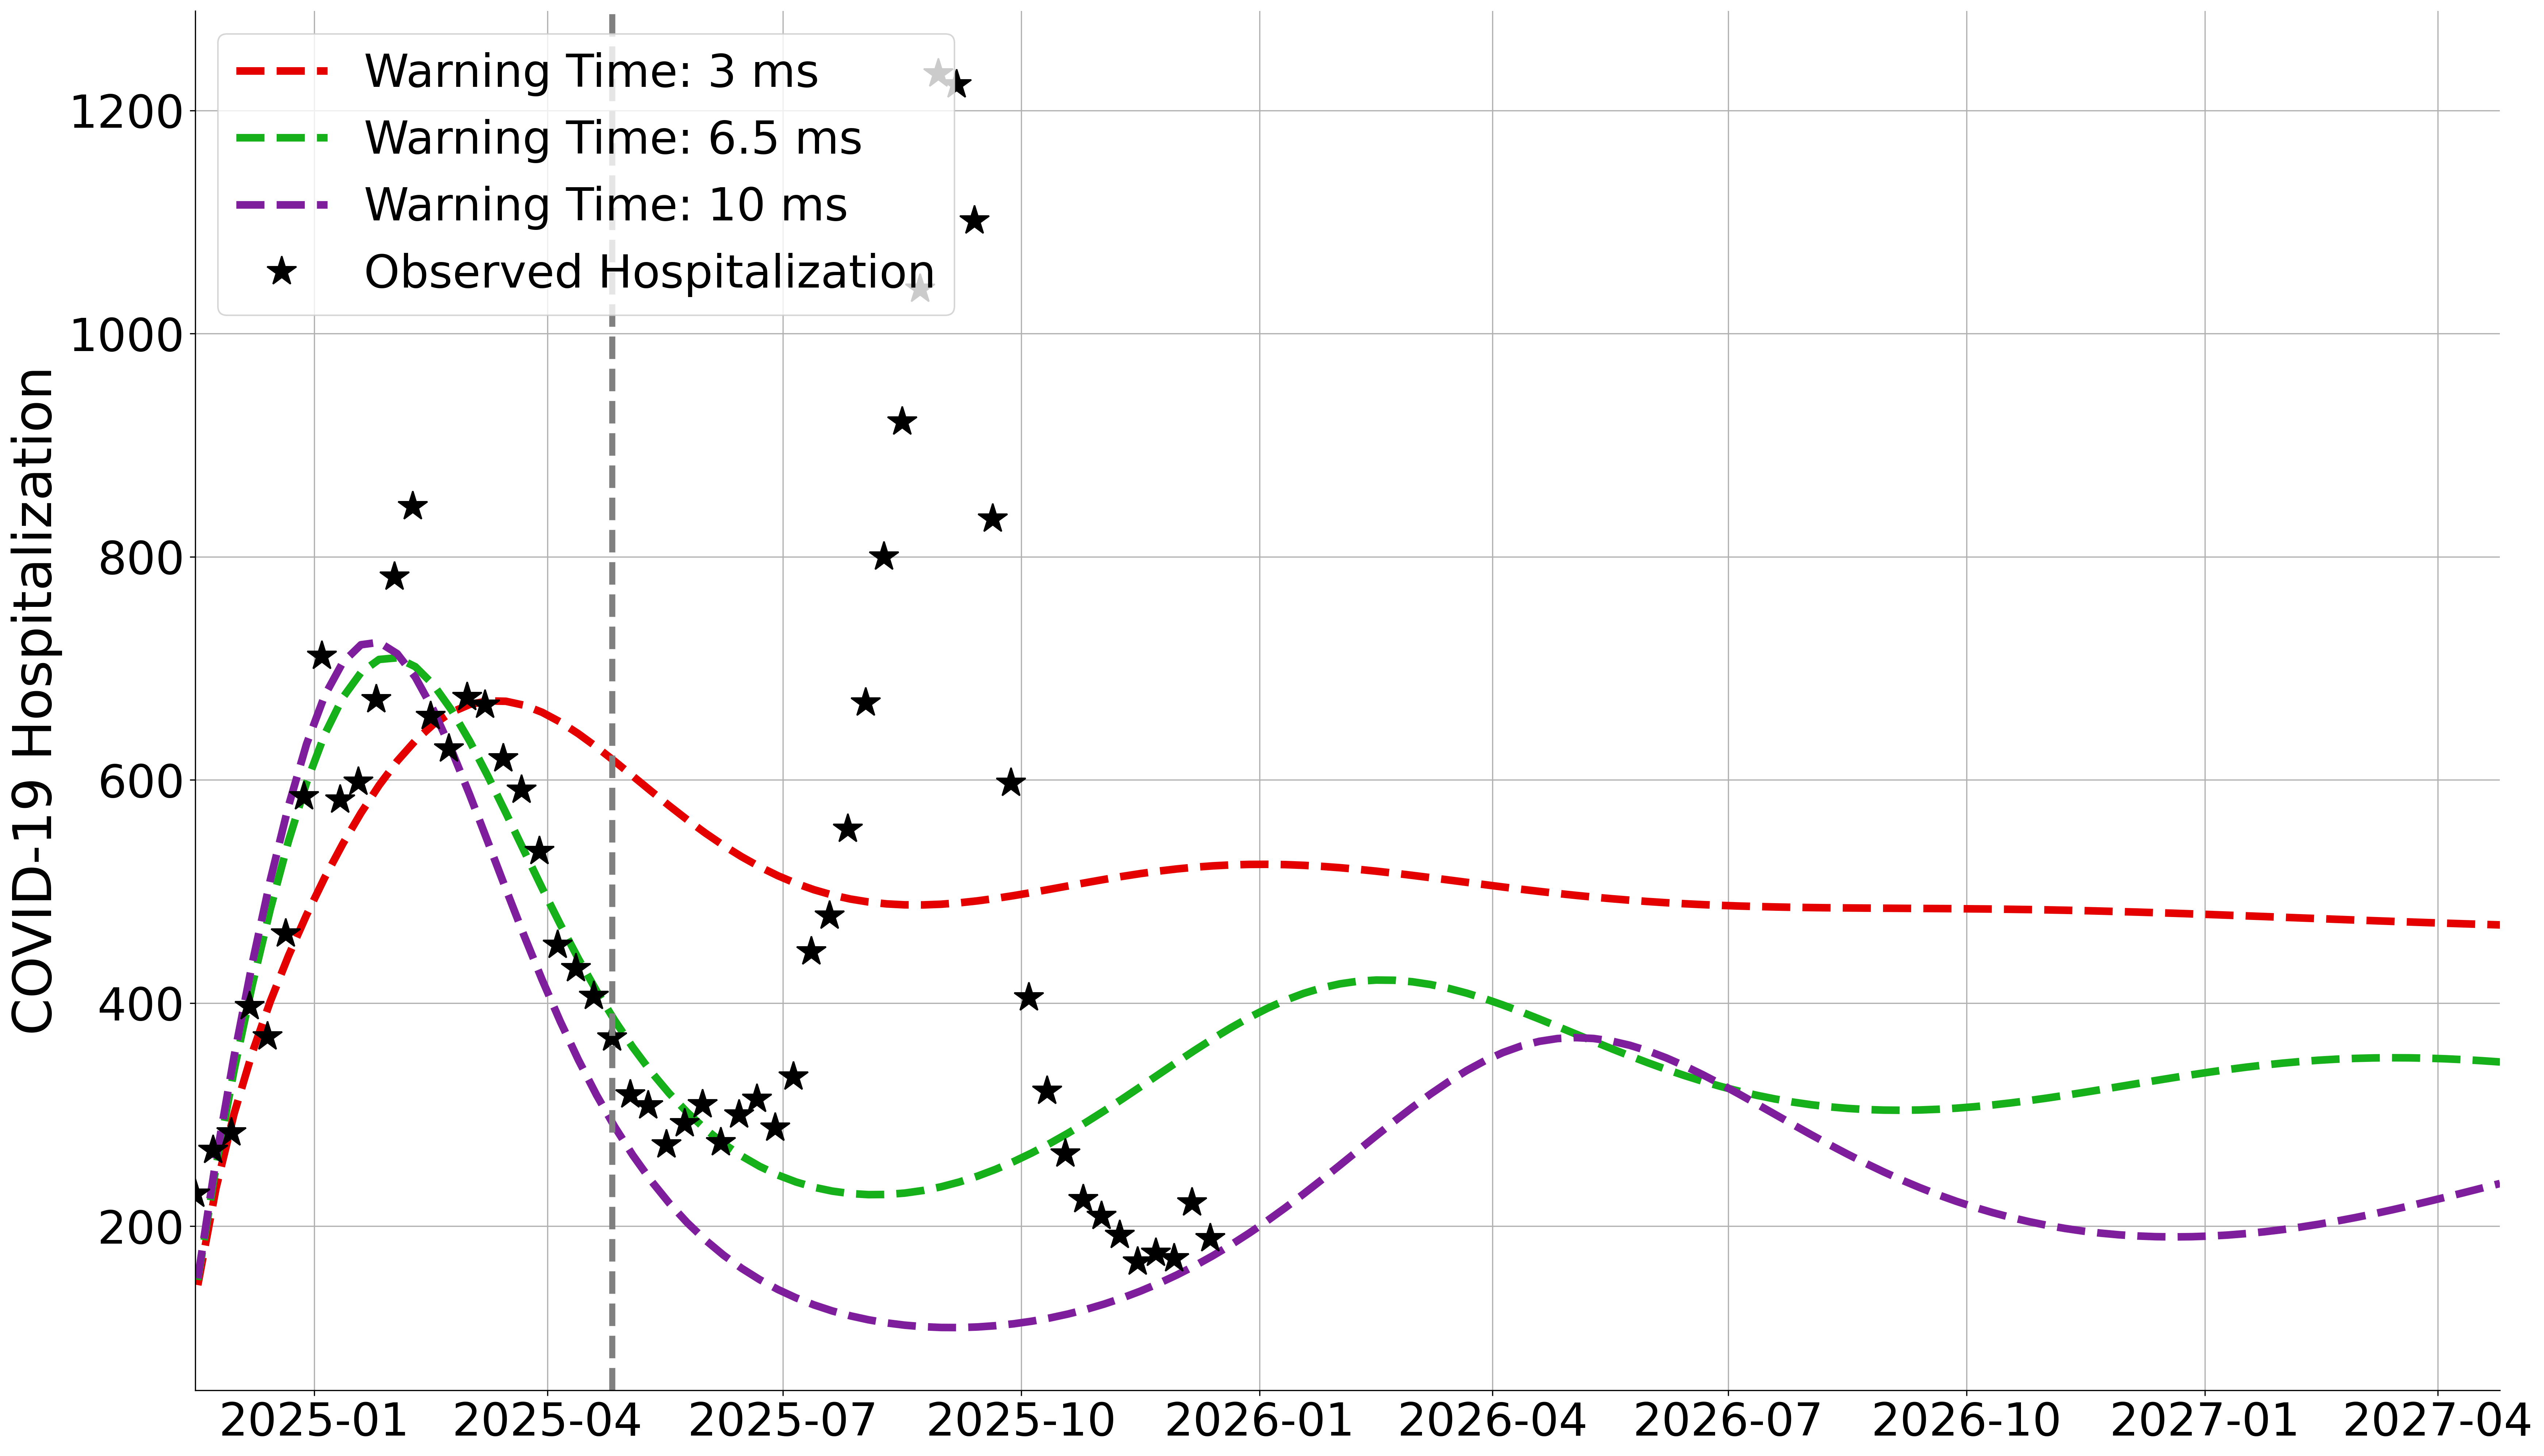

In [758]:
start_date = GC_1['date'].iloc[0]
week = len(GC_1)+71
drange1 = pd.date_range(start_date, periods=week, freq="1w")
fig = plt.figure(num=None, figsize=(24, 14), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 30})

plt.plot(drange1[1:], weekly_hosp1[:-1], '--', color='xkcd:red', lw=5, label = 'Warning Time: 3 ms')
plt.plot(drange1[1:], weekly_hosp2[:-1], '--', color='xkcd:green', lw=5, label = 'Warning Time: 6.5 ms')
plt.plot(drange1[1:], weekly_hosp3[:-1], '--', color='xkcd:purple', lw=5, label = 'Warning Time: 10 ms')


dates = pd.to_datetime(GC_1['date']).dt.to_pydatetime()
plt.plot(dates[1:], GC_1['observation'][1:], '*', color='black', markersize=20, label = 'Observed Hospitalization')

plt.axvline(pd.Timestamp('2025-04-26'), linestyle='--',  color='grey', linewidth=4)

#plt.xticks(rotation=35)
plt.ylabel('COVID-19 Hospitalization', fontsize = 35)
plt.legend(fontsize=30,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()

plt.savefig("fit2.png", dpi=300, bbox_inches="tight")

plt.show()

# no vaccine, variants

In [766]:
def sim_fit2(x, beta, reinf1):
    Nd = 180
    dt = 1

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    for tt in range(int(Nd / dt)):
          
        # Force of infection
        lambda_t = beta * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf1 * R
        
        SxS_new = SxS + reinf1 * R * (1-re_pro) - wan * SxS
        SxI_new = SxI + reinf1 * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in time:
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep
        
    return weekly_hosp[:-1]

In [767]:
reinf_list = [1/3, 1/19, 1/(2*30)]  

beta_fits = []
for reinf in reinf_list:
    # fix wan via a wrapper so curve_fit only optimizes beta
    f = lambda x, beta: sim_fit2(x, beta, reinf)

    popt, pcov = curve_fit(
        f,
        xdata,
        ydata,
        p0=[0.3],
        bounds=([0.1], [2.0]),
        maxfev=20000
    )

    beta_hat = popt[0]
    beta_fits.append(beta_hat)

In [770]:
def sim_det2(x, beta, reinf1):
    Nd = 410+510
    dt = 1

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    for tt in range(int(Nd / dt)):
          
        # Force of infection
        lambda_t = beta * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf1 * R
        
        SxS_new = SxS + reinf1 * R * (1-re_pro) - wan * SxS
        SxI_new = SxI + reinf1 * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in range(129):
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep
        
    return weekly_hosp

weekly_hosp1 = sim_det2(0, beta_fits[0], reinf_list[0])
weekly_hosp2 = sim_det2(0, beta_fits[1], reinf_list[1])
weekly_hosp3 = sim_det2(0, beta_fits[2], reinf_list[2])

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/2547893603.py:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  drange1 = pd.date_range(start_date, periods=week, freq="1w")
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/2547893603.py:12: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC_1['date']).dt.to_pydatetime()


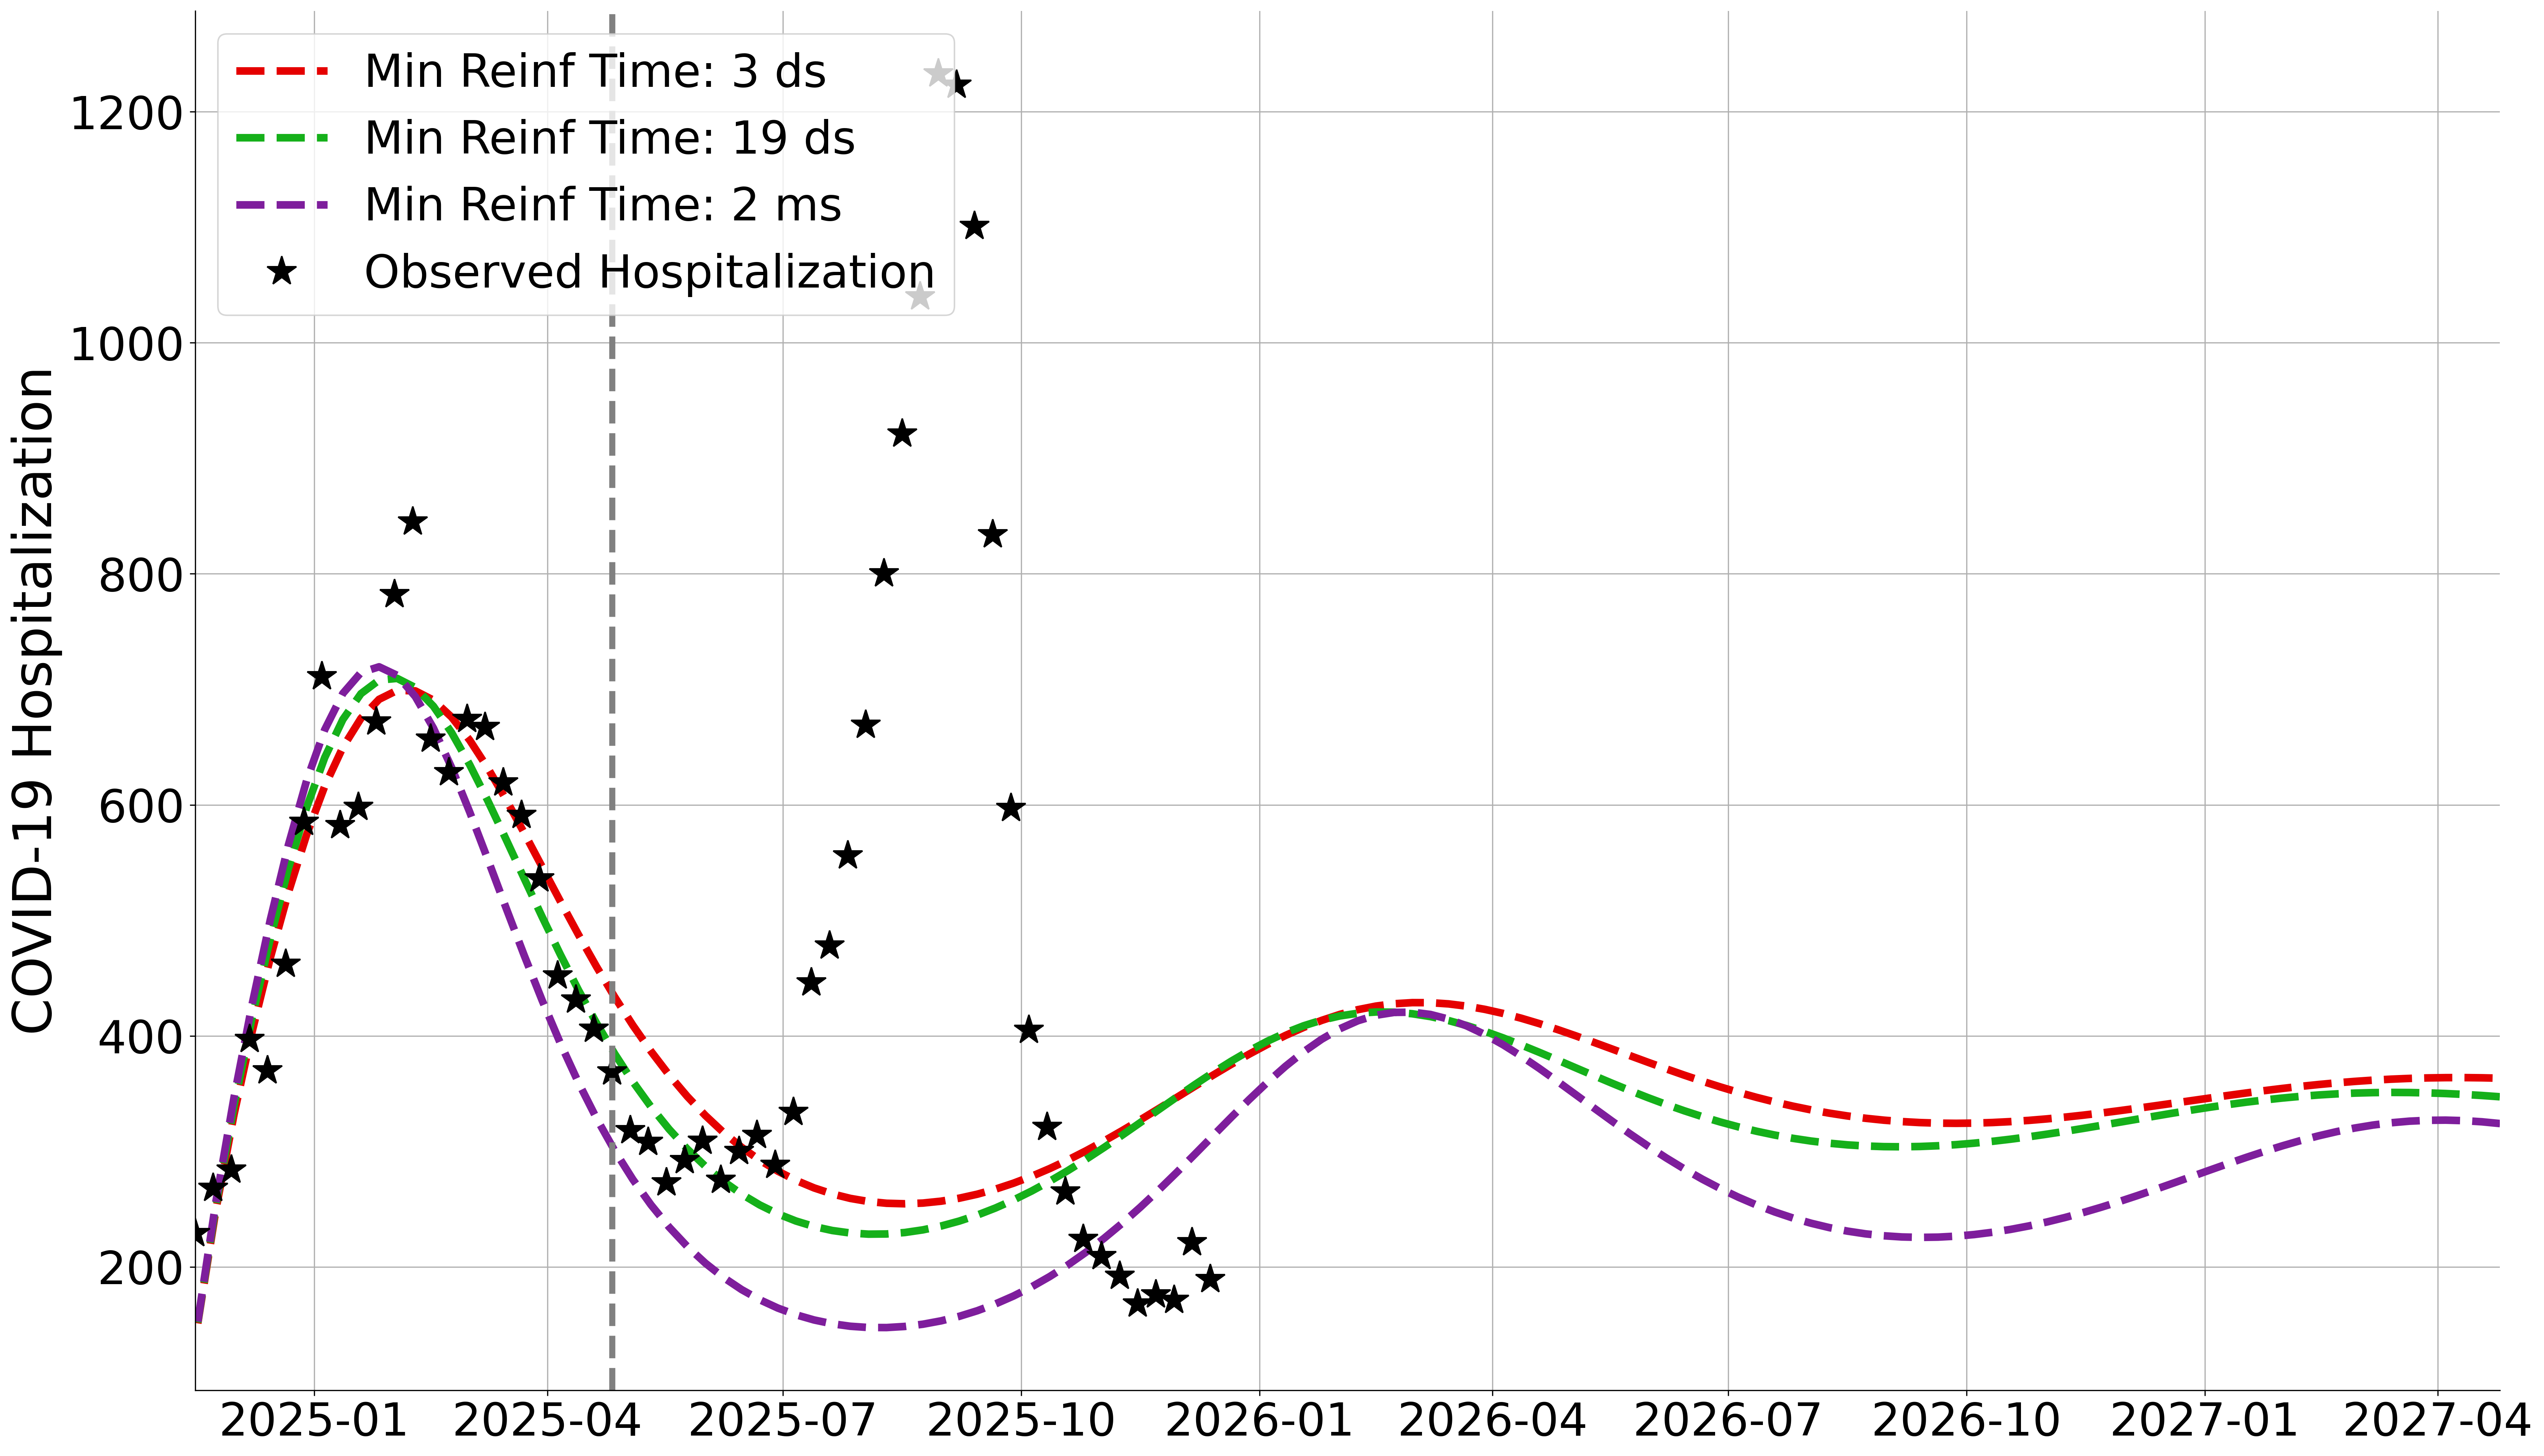

In [771]:
start_date = GC_1['date'].iloc[0]
week = len(GC_1)+71
drange1 = pd.date_range(start_date, periods=week, freq="1w")
fig = plt.figure(num=None, figsize=(24, 14), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 30})

plt.plot(drange1[1:], weekly_hosp1[:-1], '--', color='xkcd:red', lw=5, label = 'Min Reinf Time: 3 ds')
plt.plot(drange1[1:], weekly_hosp2[:-1], '--', color='xkcd:green', lw=5, label = 'Min Reinf Time: 19 ds')
plt.plot(drange1[1:], weekly_hosp3[:-1], '--', color='xkcd:purple', lw=5, label = 'Min Reinf Time: 2 ms')


dates = pd.to_datetime(GC_1['date']).dt.to_pydatetime()
plt.plot(dates[1:], GC_1['observation'][1:], '*', color='black', markersize=20, label = 'Observed Hospitalization')

plt.axvline(pd.Timestamp('2025-04-26'), linestyle='--',  color='grey', linewidth=4)

#plt.xticks(rotation=35)
plt.ylabel('COVID-19 Hospitalization', fontsize = 35)
plt.legend(fontsize=30,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()

plt.savefig("fit3.png", dpi=300, bbox_inches="tight")

plt.show()

In [886]:
def sim_sto(x, beta_bar, std, kappa, seed=None):
    Nd = 410+510
    dt = 1

    if seed is not None:
        rng = np.random.default_rng(seed)
        randn = rng.standard_normal
    else:
        randn = np.random.randn

    # Initialize compartments
    V = vacc_ts["total_vaccinated"].loc[0]  #2_606_590
    Inh = 160_000* IHR_pe
    Inr = 160_000* (1-IHR_pe)
    Imh = 80_000* IHR_pe
    Imr = 80_000* (1-IHR_pe)
    R = 200_000
    Hd = 10_000* HDR
    Hr = 10_000* (1-HDR)
    D = 70
    SxS = 6_000_000 *(1-re_pro)
    SxI = 6_000_000 *re_pro
    S = N-V-Inh-Inr-Imh-Imr-R-Hd-Hr-D-SxS-SxI

    # Next-step placeholders
    V_new = 0
    Inh_new = 0
    Inr_new = 0
    Imh_new = 0
    Imr_new = 0
    R_new = 0
    Hd_new = 0
    Hr_new = 0
    D_new = 0
    S_new = 0
    SxS_new = 0
    SxI_new = 0

    # Count
    case_count = 0
    hosp_count = 0

    # Output arrays
    cumcase = np.zeros(Nd)
    cumhosp = np.zeros(Nd)
    newcase = np.zeros(Nd)
    newhosp = np.zeros(Nd)

    #parameter
    sig = sigma_pe
    gam1 = gamma_pe
    IHR = IHR_pe
    epsilon1 = epsilon1_pe

    beta_t = beta_bar

    for tt in range(int(Nd / dt)):

# -----------------------------
# Optional: mean-reverting Ito beta (OU), often nicer than free Brownian drift
# dβ = κ(β̄ - β) dt + σ dW
# -----------------------------
          
        # Force of infection
        sqrt_dt = np.sqrt(dt)
        dW = sqrt_dt * float(randn())
        beta_t = beta_t + kappa * (beta_bar - beta_t) * dt + std * dW
        beta_t = float(np.clip(beta_t, 0.0, 5.0))

        lambda_t = beta_t * (Inh + Inr + Imh + Imr) / N

        # Vaccination
        week_idx = min(round(tt // 7), len(y_vac) - 1)
        vac_d = y_vac[week_idx]/7

        # Transitions
        S_new = S + wan * SxS - vac_d - lambda_t * S
        V_new = V + vac_d - lambda_t * V * (1 - epsilon1)

        Imh_new = Imh + lambda_t * (V + SxI) * (1 - epsilon1) *IHR - (1-epsilon2) * delta * Imh
        Imr_new = Imr + lambda_t * (V + SxI) * (1 - epsilon1) *(1 - IHR) - gam1 * Imr
        Inh_new = Inh + lambda_t * S * IHR - delta * Inh
        Inr_new = Inr + lambda_t * S * (1 - IHR) - gam1 * Inr
        Hd_new = Hd + (delta * (1-epsilon2) * Imh + delta * Inh) * HDR - eta * Hd
        Hr_new = Hr + (delta * (1-epsilon2) * Imh + delta * Inh) *(1 - HDR) - gam2 * Hr
        
        D_new = D + eta * Hd
        R_new = R + gam1 * (Imr + Inr) +  gam2 * Hr - reinf * R
        
        SxS_new = SxS + reinf * R * (1-re_pro) - wan * SxS
        SxI_new = SxI + reinf * R * re_pro - lambda_t * (1 - epsilon1) * SxI

        # Cumulative
        case_count = case_count + lambda_t * (V + SxI) * (1 - epsilon1) + lambda_t * S
        cumcase[tt] = case_count # cumulative case count up to day tt
        hosp_count = hosp_count + delta * (1-epsilon2) * Imh + delta * Inh
        cumhosp[tt] = hosp_count # cumulative hospitalization count up to day tt
        newcase[tt] = lambda_t * V * (1 - epsilon1) + lambda_t * S # New infectious on day tt
        newhosp[tt] = delta * (1-epsilon2) * Imh + delta * Inh # New hospitalized on day tt

        # Update state
        S, SxS, SxI, V, Inh, Inr, Imh, Imr, Hd, Hr, R, D = S_new, SxS_new, SxI_new, V_new, Inh_new, Inr_new, Imh_new, Imr_new, Hd_new, Hr_new, R_new, D_new

    # Convert daily new hospitalizations to weekly
    weekly_hosp = []
    for i in range(129):
        start = 7 * i
        end = 7 * (i + 1)
        weekly_sum = np.sum(newhosp[start:end])
        weekly_hosp.append(weekly_sum)
   
    # Convert to NumPy array so advanced indexing works
    weekly_hosp = np.array(weekly_hosp) * rep

    print(beta_t)
        
    return weekly_hosp

In [869]:
from numpy import genfromtxt ## generated seed table for respective comparison instead of totally random 
seed_table= genfromtxt('seed.csv', delimiter=',')
seed_table = seed_table[:,2]

In [880]:
from scipy.signal import detrend
resid = np.log(GC_['observation'][1:]+1) - np.log(weekly_hosp[:-1]+1) 
resid = detrend(resid) 
std = np.std(resid) / np.sqrt(7)
std

0.05151287395609938

In [893]:
rho1 = np.corrcoef(resid[:-1], resid[1:])[0,1]
kappa = -np.log(rho1) / 7
kappa

0.15103995055455796

In [894]:
def sim_run():
    Nsim = 200 # the number of simulations
    Nd = week # weeks
    dt = 1

    new_Hosp = np.zeros([Nd-1, Nsim]) #weekly new hospitalization
    seed_list = np.zeros([Nsim, 1])

    # Parameters
    beta = popt  #from previous model fitting
    #std = np.sqrt(pcov) #0.001
    std = 0.05*0.2
    kappa = 0.15

    for i in range(Nsim):
        val = seed_table[i]

        if not np.isfinite(val):
            seed = None
        else:
            seed = int(val)
        seed_list[i] = seed
        weekly_hosp = sim_sto(0, beta, std, kappa, seed=seed) 
        new_Hosp[:, i] = weekly_hosp[:-1]

    # Percentile calculations for infection and hospitalization
    percentiles = [0, 1, 2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                   55, 60, 65, 70, 75, 80, 85, 90, 95, 97.5, 99, 100]
    new_Hosp_p = np.percentile(new_Hosp, percentiles, axis=1).T

    return new_Hosp, new_Hosp_p

new_Hosp, new_Hosp_p = sim_run()

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/1325609360.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta_t = float(np.clip(beta_t, 0.0, 5.0))


0.26421842737334805
0.2249850853608624
0.231159095448537
0.2531056528590928
0.26313609597836507
0.20810305279169755
0.26283492282723775
0.2712458076473243
0.2702544821514361
0.25604699028685174
0.20933740917090168
0.2507082730685533
0.2654900926172218
0.248204993017073
0.2610678717336421
0.22162198709303746
0.25656377491706234
0.2289849610118005
0.20130390554933233
0.2615436273796884
0.23825211859652226
0.25118093524892515
0.2609703709754427
0.25100850916193507
0.27075199706836595
0.22190128344065932
0.25042770744736353
0.22667072992578033
0.25169929590721835
0.22667072992578033
0.23816983561437957
0.226899605101255
0.2941926077775473
0.22505312426331744
0.27195913040934233
0.2360463919430182
0.21069536061315405
0.2634936874110015
0.25129676472550216
0.2321202789406356
0.2080706551700861
0.23535575783578028
0.25656377491706234
0.2571697706357124
0.2615598201943555
0.2217861539958033
0.2323282094275686
0.2471922909134407
0.2399808212734531
0.24237564509337306
0.26432748474685686
0.24299

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/819845281.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  drange1 = pd.date_range(start_date, periods=week, freq="1w")
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_66525/819845281.py:8: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = pd.to_datetime(GC_1['date']).dt.to_pydatetime()


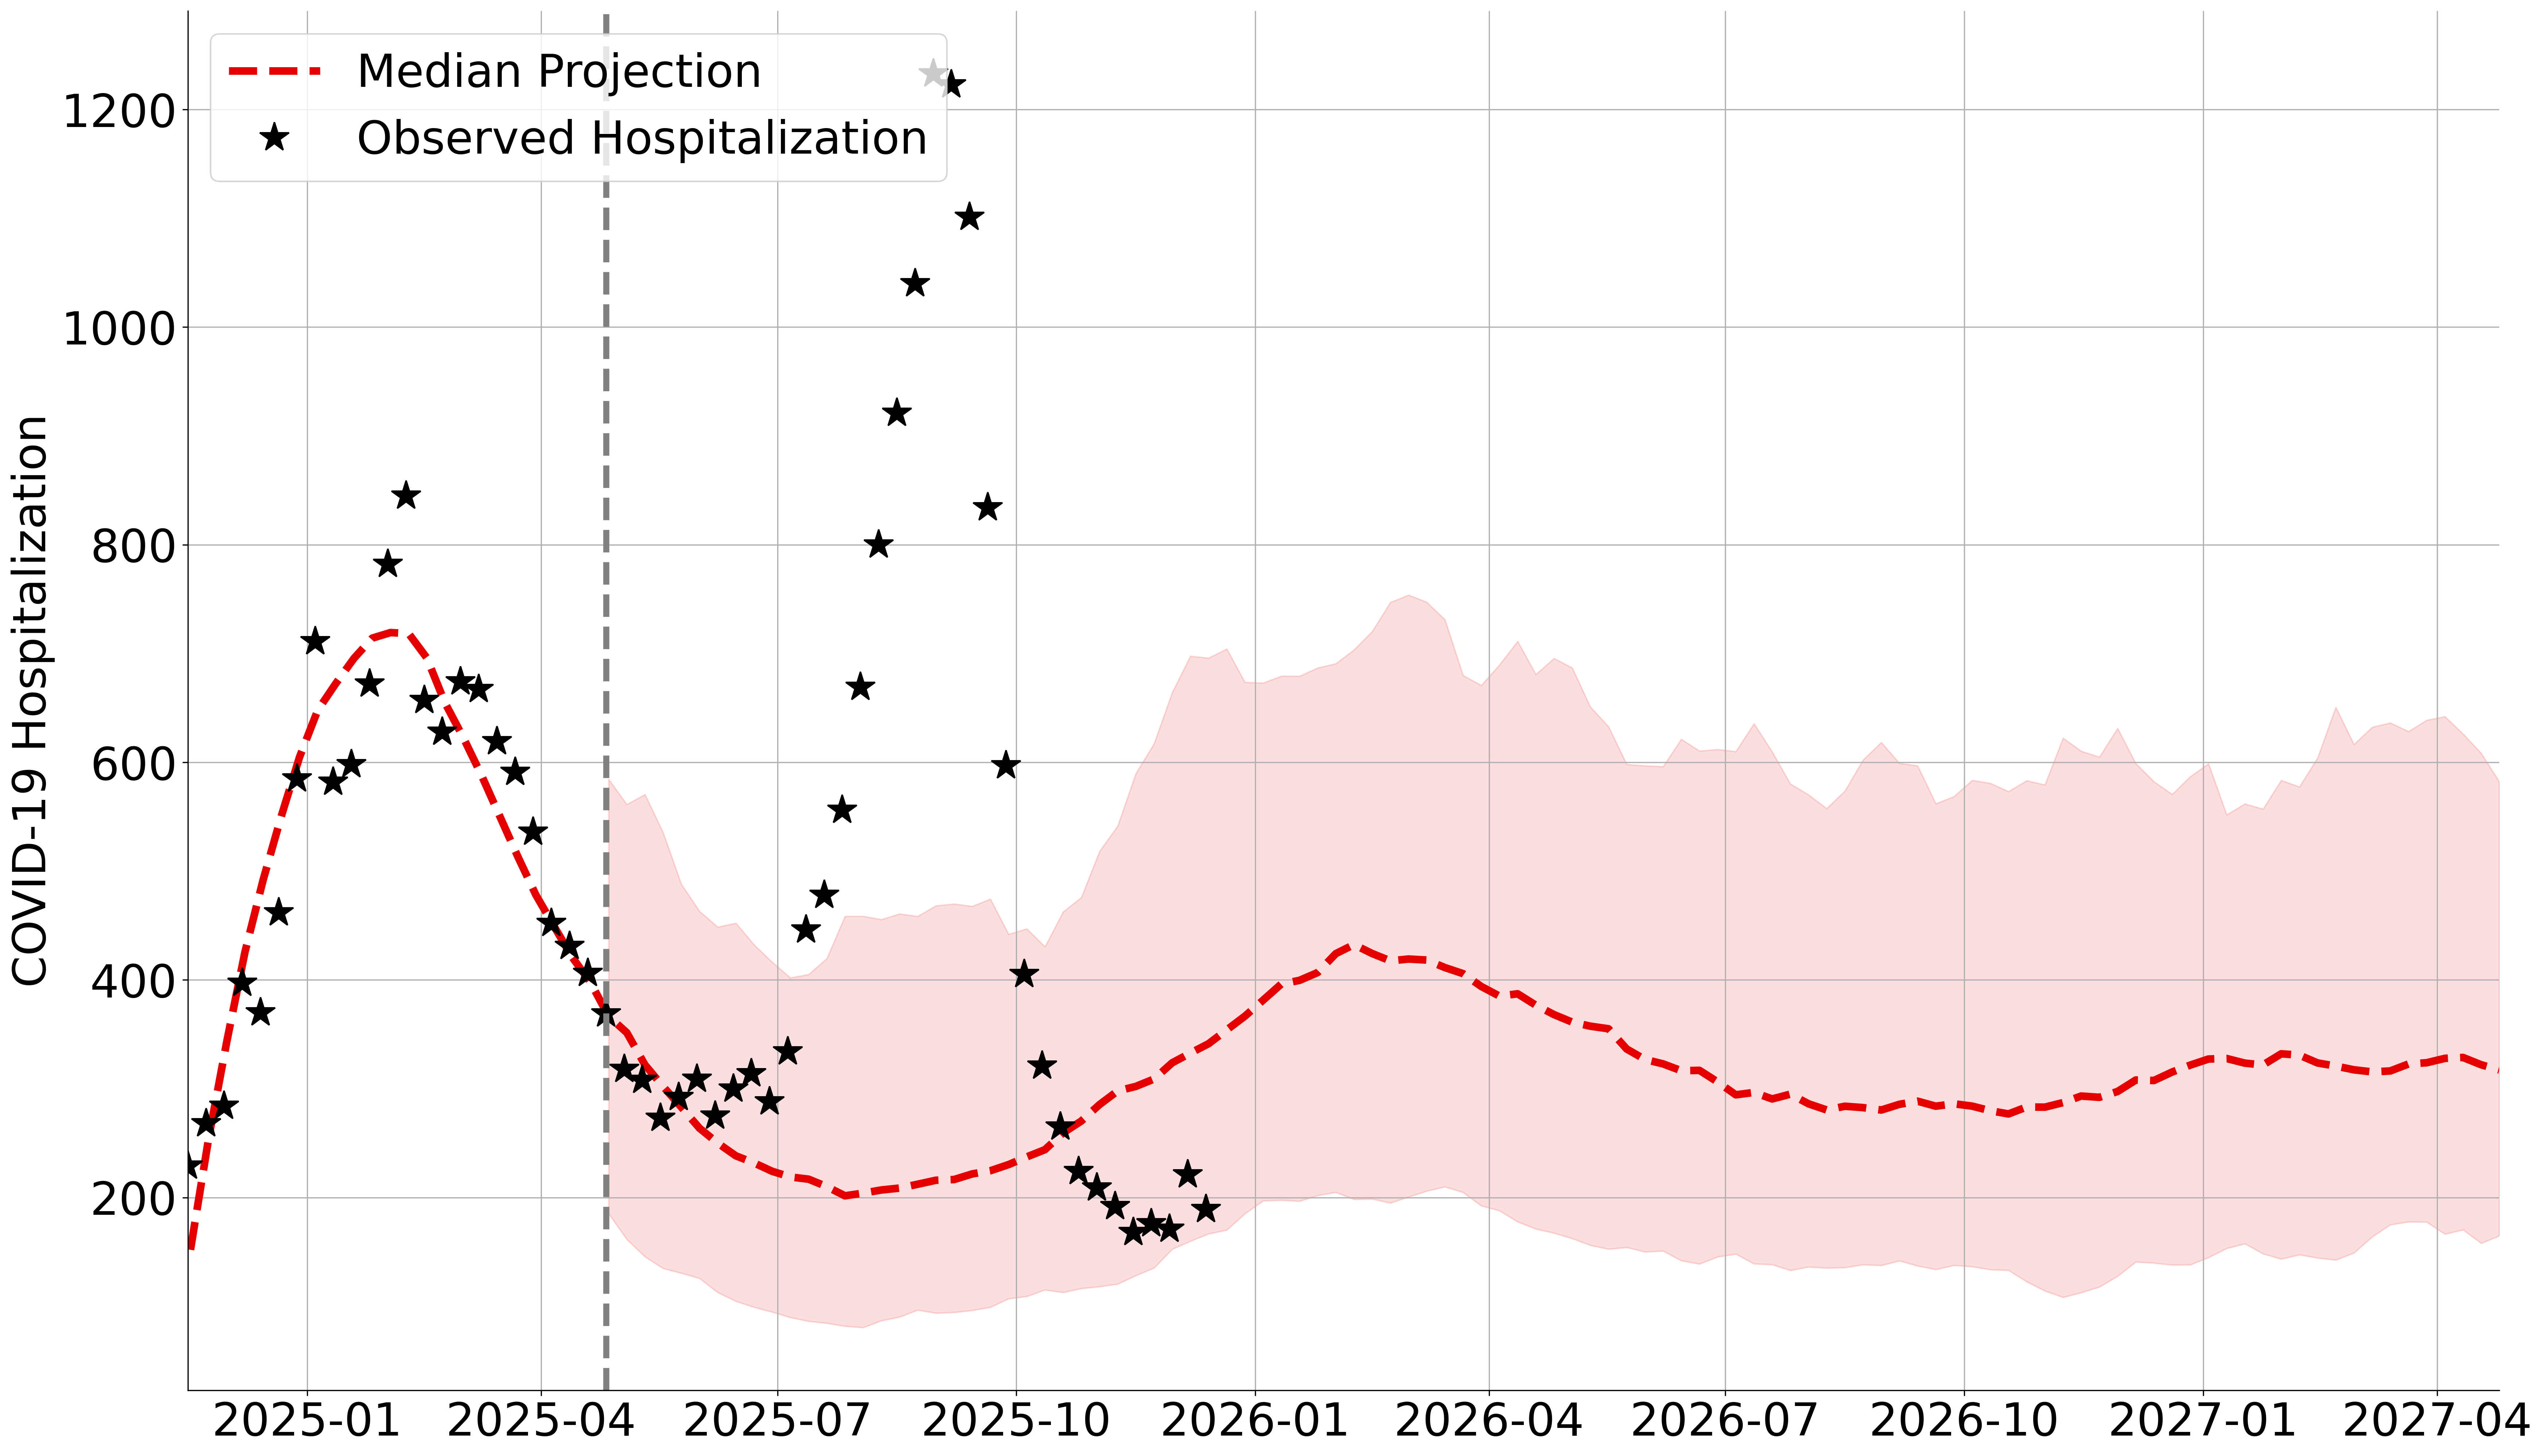

In [895]:
drange1 = pd.date_range(start_date, periods=week, freq="1w")
fig = plt.figure(num=None, figsize=(24, 14), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 30})

plt.fill_between(drange1[24:], new_Hosp_p[23:,2], new_Hosp_p[23:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1[1:], new_Hosp_p[:,12], '--', color='xkcd:red', lw=5, label = 'Median Projection')

dates = pd.to_datetime(GC_1['date']).dt.to_pydatetime()
plt.plot(dates[1:], GC_1['observation'][1:], '*', color='black', markersize=20, label = 'Observed Hospitalization')

plt.axvline(pd.Timestamp('2025-04-26'), linestyle='--',  color='grey', linewidth=4)

plt.tick_params(axis='both', labelsize=30)
plt.ylabel('COVID-19 Hospitalization', fontsize = 30)
plt.legend(fontsize=30,loc='upper left');
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()

plt.savefig("sto1.png", dpi=300, bbox_inches="tight")

plt.show()
